In [1]:
import warnings

warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
import torch
import numpy as np

from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch import nn
from torch.utils.data import random_split, DataLoader
from torchvision.transforms import v2, functional as F
from forest_cover_change_detection.dataloaders.change import ChangeDetectionDataset
from forest_cover_change_detection.models.fc_ef import FCFE
from forest_cover_change_detection.trainer.train import Compile
from forest_cover_change_detection.metrics.accuracy import *

### Loading Data

In [2]:
data_set = ChangeDetectionDataset('../data/annotated',
                                  '../data/new_train.csv'
                                  )

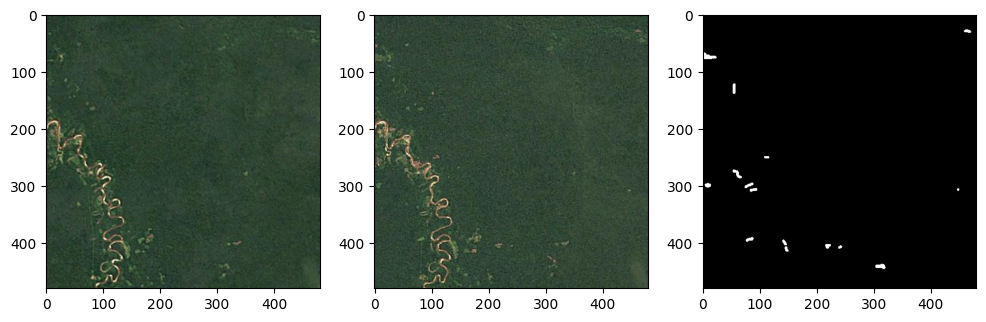

In [3]:
img, label = data_set[np.random.randint(0, data_set.__len__())]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 8), dpi=100)
axes = axes.ravel()

axes[0].imshow(img[:3, ::].permute(1, 2, 0).numpy())
axes[1].imshow(img[3:, ::].permute(1, 2, 0).numpy())
axes[2].imshow(label.numpy(), cmap='gray')

In [4]:
train_size = int(len(data_set) * 0.8)
test_size = len(data_set) - train_size

train_dataset, test_dataset = random_split(data_set, (train_size, test_size))

train_dataloader = DataLoader(train_dataset, batch_size=24, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=24, shuffle=True)

In [5]:
next(iter(train_dataloader))[0].shape, next(iter(train_dataloader))[1].shape

(torch.Size([24, 6, 480, 480]), torch.Size([24, 480, 480]))

### Modeling

In [6]:
model = FCFE(6, 3, classes=2)

In [7]:
optimizer = AdamW(model.parameters(), lr=0.001)
scheduler = ReduceLROnPlateau(optimizer, factor=0.1, cooldown=8)

compiled = Compile(model,
                   optimizer,
                   lr_scheduler=scheduler
                   )

In [8]:
# compiled.summary((6, 480, 480))

In [9]:
results = compiled.train(train_dataloader,
                         nn.NLLLoss(),
                         50,
                         test_dataloader)

Epoch:   0%|          | 0/50 [00:00<?, ?it/s]

Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.93222137409098


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 1.9689855310651991


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.620261211605633


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.35478268067042035


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.3405772254747503


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.17706593208842808


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.20994017842937918


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.1484391912817955


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.16699999965289059


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.15366325775782266


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.15976297000751777


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.1677220438917478


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.15521916155429447


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.1513596789704429


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.14743700382464073


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.14514125221305424


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.14414405450224876


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.1416146440638436


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.13809235152952812


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.1497144972284635


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.1357453737188788


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.1563104564944903


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.14364960570545757


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.14740514838033253


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.13774870620930896


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.148126144376066


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.1343722705017118


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.1491545413931211


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.1325278334757861


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.25138989008135265


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.13619282293845625


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.17017903013361824


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.13129672210882692


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.14721564617421892


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.13190801332102103


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.16724324805868995


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.12945200415218577


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.15029138492213356


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.12175489721052787


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.1700945281320148


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.11931800469756126


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.18918997214900124


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.11928930221235051


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.1723131620221668


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.12019446733243325


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.1898126651843389


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.12181106363149251


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.17840622613827387


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.11609466571141691


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.20413114958339268


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.11726215613238952


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.21302978694438934


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.11786196797209628


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.1915117535326216


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.1175245947259314


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.20001210355096394


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.11503103068646263


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.18514394842916065


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.11580678974004353


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.18273959474431145


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.11731144720140625


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.1896569240424368


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.11688853931777618


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.18585557407803005


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.11690119062276448


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.21068157504002252


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.11536733082988683


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.17322092751661936


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.11647441238164902


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.20509030007653767


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.11288373369504423


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.18120189673370785


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.11487591420026387


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.1850617155432701


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.11493210275383557


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.1835634559392929


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.11105856387054219


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.20935872362719643


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.112485600525842


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.19900456070899963


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.11165157354929868


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.19702133370770347


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.11386140151058927


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.2063306321700414


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.11185451049138517


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.18637303014596304


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.11117398125283859


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.1941931802365515


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.11137133047861211


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.19058484418524635


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.11221578782972168


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.20002168748113844


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.11284978446715019


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.1920476464761628


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.11110326527234386


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.19073904554049173


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.11123207781244726


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.20041930509938133


Training:   0%|          | 0/34 [00:00<?, ?it/s]

train loss: 0.11205112934112549


Validation:   0%|          | 0/9 [00:00<?, ?it/s]

val loss: 0.18835470411512586


In [10]:
torch.save(model, "../checkpoints/fcfe/final-model.pth")

In [21]:
i = np.random.randint(0, len(test_dataset))
img = test_dataset[i][0]

with torch.no_grad():
    model.eval()
    logits = model(img.unsqueeze(0).to('cuda'))[0].cpu()
    pred = torch.argmax(torch.sigmoid(logits), dim=0)

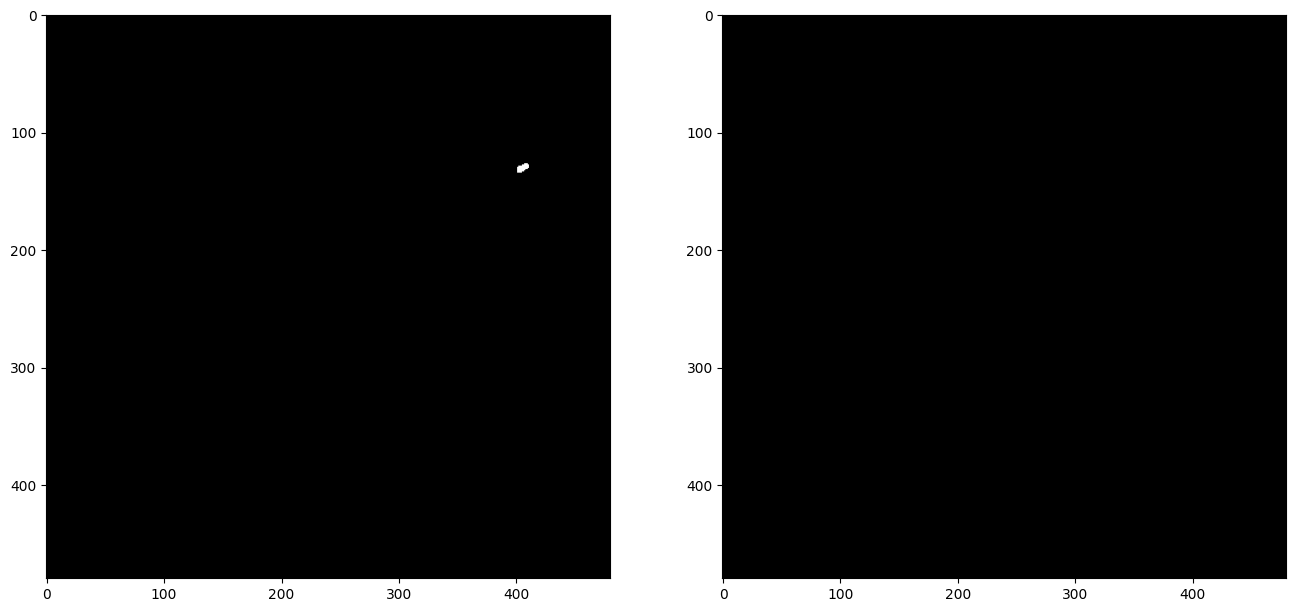

In [22]:
# plt.imshow(np.swapaxes(pred.numpy(), 0, 2))
# plt.imshow((pred > 0.01).permute(1, 2, 0).numpy(), cmap='gray')
plt.figure(figsize=(16,10))
plt.subplot(1, 2, 1)
plt.imshow(test_dataset[i][1], cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(pred, cmap='gray')

In [19]:
tp = np.logical_and(pred, test_dataset[i][1]).sum()
tn = np.logical_and(np.logical_not(pred), np.logical_not(test_dataset[i][1])).sum()
fp = np.logical_and(pred, np.logical_not(test_dataset[i][1])).sum()
fn = np.logical_and(np.logical_not(pred), test_dataset[i][1]).sum()

tp, tn, fp, fn

(tensor(1300), tensor(218206), tensor(44), tensor(10850))

In [20]:
prec = tp / (tp + fp)
rec = tp / (tp + fn)
dice = 2 * prec * rec / (prec + rec)

prec, rec, dice

(tensor(0.9673), tensor(0.1070), tensor(0.1927))